<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/01_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 목표
- 유방암 데이터셋을 활용한 모델링(이진분류)
- 환자의 종양 특성 정보를 바탕 → 해당 종양이 양성(malignant, 암), 양성(Bengin, 비암)인지 분류하는 모델

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

In [5]:
# 데이터셋 로드
breast_data = load_breast_cancer()

In [6]:
# 유방암 데이터셋 키값 확인
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# X(문제), y(정답) 나누기
X = breast_data["data"]
y = breast_data["target"]

In [8]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025, stratify = y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### 딥러닝 모델 구현 (이진분류)
- 단층퍼셉트론 : 입력과 출력만 존재, 선형회귀 + 활성화 함수
- MLP(Multi Layer Perceptron, 단층 퍼셉트론) : 단층퍼셉트론에서 은닉층이 추가된 구조
  - 복잡한 비선형성 패턴을 학습할 수 있도록 만들어진 구조. (XOR 문제)

In [10]:
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층, 중간층/출력층

In [11]:
# 1. 신경망 구조 설계

# 1) 뼈대 생성(초기화)
model = Sequential()

# 2) 입력층 - 입력 모양을 잡아주는 역할
model.add(InputLayer(shape = (30,))) # 데이터셋의 데이터 1ea의 모양 지정

# 3) 중간층(은닉층) - 복잡한 연산을 담당.
model.add(Dense(units = 32, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))
model.add(Dense(units = 256, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 32, activation = "sigmoid"))

# 4) 출력층
model.add(Dense(units = 1, activation = "sigmoid"))

# 이진분류 - 왜 1개의 뉴런인가?
# 분류의 출력형태는 sigmoid로 인해 확률값. → 그래서 마지막 중간층의 출력값을 0 ~ 1 사이의 값으로 반환

### 활성화 함수(activation)의 역할
- 딥러닝 모델의 각 뉴런(노드)이 다음 뉴런으로 신호를 보낼지 말지 결정하는 스위치 역할
- 모델에 비선형을 부여해 복잡한 문제 해결 능력을 줌

#### 시그모이드(Sigmoid)
- 가장 초창기부터 사용된 활성화 함수
- 어떤 값이 들어와도 0~1 사이의 값으로 변환
- 출력이 확률처럼 해석하기 쉬움
- 기울기 소실(Vanishing Gradient) : 문제 입력 값이 너무 크거나 작으면 함수의 기울기가 거의 0에 가까워져서 학습이 잘 이루어지지 않는 문제<br>
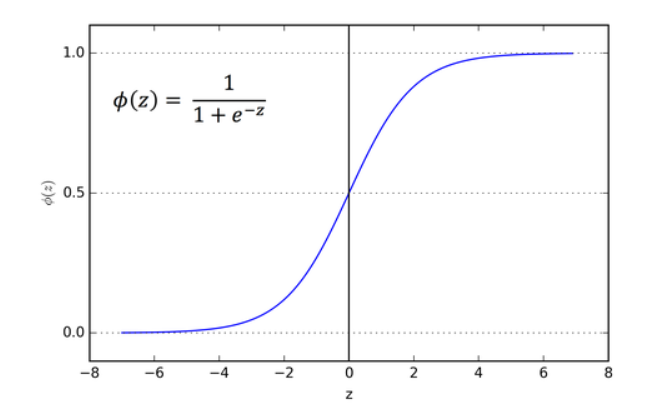

#### ReLU(Rectified Linear Unit)
- 현재 가장 널리 사용되고 있는 활성화 함수
- 입력 값이 0보다 작으면 무조건 0을 출력, 입력값이 0보다 크면 그 값 그대로 출력
- 장점 : 계산이 매우 단순하고 빠름, 기울기 소실 문제 해결 가능
- 단점 : 죽은 ReLu -> 학습 과정에서 뉴런의 입력값이 0보다 계속해서 작게되면 그 뉴런은 계속 0만 출력하게 돼 학습 능력을 잃을 수 있음<br>
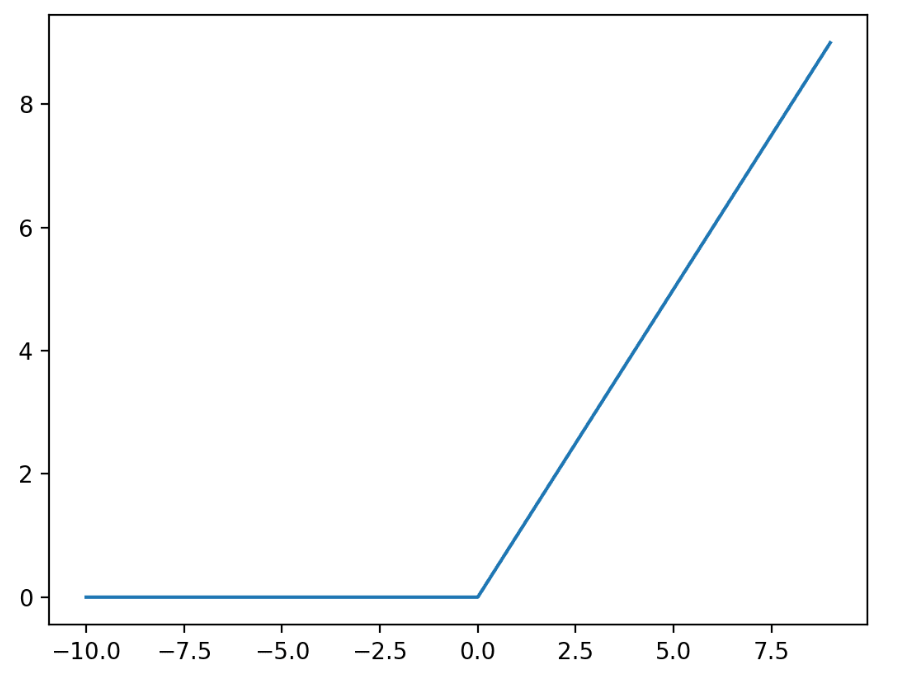

In [12]:
# 2. 학습 방법 설정 - 출력 형태에 따라 다르게 설정
model.compile(
    loss = "binary_crossentropy", # 오차를 구해주는 도구 : 손실 함수
    optimizer = "adam",           # 최적화 함수 : 모델의 오차를 최소화해주는 도구
    metrics = ["accuracy"]        # 평가 지표 : 분류 모델 -> 정확도 사용
)

### Optimizer(최적화 함수)
- 모델의 오차(loss)를 최소화하기 위해 가중치를 업데이트하는 알고리즘
- 모델이 얼마나 틀렸는지를 보고 학습 방향을 결정하는 역할

1. SGD : 단순한 경사하강법
2. Momentum : 이전에 이동한 방향(관성)을 고려
3. RMSProp : 최근 기울기의 변화에 따라 학습률 조절
4. Adam : Momentum + RMSProp 결합, 가장 많이 사용되는 추세

In [13]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6464 - loss: 0.6536 - val_accuracy: 0.5750 - val_loss: 0.6997
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6388 - loss: 0.6559 - val_accuracy: 0.5750 - val_loss: 0.6894
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6415 - loss: 0.6525 - val_accuracy: 0.5750 - val_loss: 0.6997
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6816 - loss: 0.6270 - val_accuracy: 0.5750 - val_loss: 0.7040
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6212 - loss: 0.6735 - val_accuracy: 0.5750 - val_loss: 0.6876
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6540 - loss: 0.6461 - val_accuracy: 0.5750 - val_loss: 0.6905
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6357 - loss: 0.6554 - val_accuracy: 0.5750 - val_loss: 0.6965
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6659 - loss: 0.6372 - val_accuracy: 0.5750 - val_loss: 0.6976

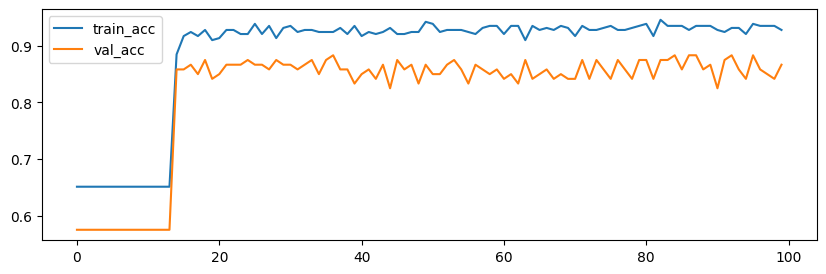

In [19]:
# 4. 학습 결과 시각화
plt.figure(figsize = (10, 3))
plt.plot(h.history["accuracy"], label = "train_acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()
# 초기 epoch에는 local minima에 빠져서 정확도가 향상되지 않음.
# 그러나 adam으로 빠져나와 global minimum을 찾아가는 모습이 관찰됨

In [22]:
# sigmoid/ReLU 사용
# 1. 신경망 구조 설계
# 1-1 뼈대 생성
model = Sequential()

# 1-2 입력층
model.add(InputLayer(shape = X_train[0].shape))

# 1-3 중간층 -> ReLU
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 16, activation = "relu"))

# 1-4 출력층 동일하게
model.add(Dense(units = 1, activation = "sigmoid"))
# 출력층에서 activation의 역할은 중간층의 activation의 역할과는 다름.
# 출력층에서는 활성화 함수는 문제 유형에 맞는 결과 형태로만 변환
# 1. 회귀 : linear(default)
# 2. 이진분류 : sigmoid(해당 클래스에 속할 확률)
# 3. 다중분류(class가 3개 이상) : softmax

In [23]:
# optimizer 비교 실습
# 2. 학습 방법 결정
# optimizer만 다르게 설정
model.compile(loss = 'binary_crossentropy',
              optimizer = "sgd",
              metrics = ["accuracy"])
# optimizer = 'sgd'
# optimizer = 'rmsprop'
# optimizer = 'sgd'

In [27]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9214 - loss: 0.2524 - val_accuracy: 0.8833 - val_loss: 0.3046
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9336 - loss: 0.2453 - val_accuracy: 0.8750 - val_loss: 0.3119
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8924 - loss: 0.2640 - val_accuracy: 0.8083 - val_loss: 0.4329
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8826 - loss: 0.2836 - val_accuracy: 0.8917 - val_loss: 0.2987
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9418 - loss: 0.2210 - val_accuracy: 0.8500 - val_loss: 0.3769
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9493 - loss: 0.2213 - val_accuracy: 0.8833 - val_loss: 0.3039
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8953 - loss: 0.2732 - val_accuracy: 0.8667 - val_loss: 0.3231
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9043 - loss: 0.2764 - val_accuracy: 0.7833 - val_loss: 0.4788

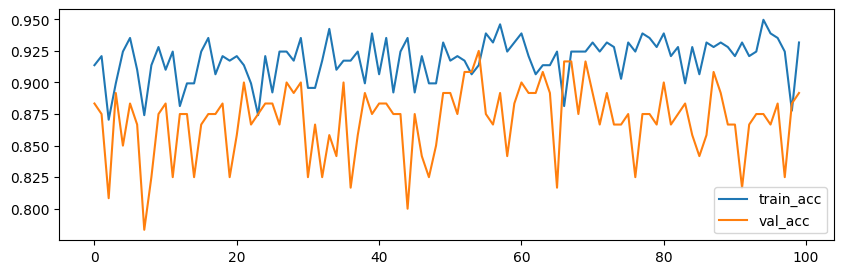

In [28]:
# 4. 학습 결과 시각화
plt.figure(figsize = (10, 3))
plt.plot(h.history["accuracy"], label = "train_acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

In [38]:
from tensorflow.keras.optimizers import SGD # sgd + momentum

In [39]:
optimizer = SGD(learning_rate = 0.02, momentum = 0.9)
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ["accuracy"])

In [40]:
h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5994 - loss: 0.6793 - val_accuracy: 0.5750 - val_loss: 6.3524
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6856 - loss: 0.6264 - val_accuracy: 0.5750 - val_loss: 6.3601
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6677 - loss: 0.6366 - val_accuracy: 0.5750 - val_loss: 6.3610
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6604 - loss: 0.6409 - val_accuracy: 0.5750 - val_loss: 6.3602
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6136 - loss: 0.6707 - val_accuracy: 0.5750 - val_loss: 6.3554
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6161 - loss: 0.6683 - val_accuracy: 0.5750 - val_loss: 6.3581
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6329 - loss: 0.6581 - val_accuracy: 0.5750 - val_loss: 6.3606
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6708 - loss: 0.6347 - val_accuracy: 0.5750 - val_loss: 6.367

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(h.history["accuracy"], label = "train_acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()